In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dane dotyczą przedsięciorstw w Tajwanie z lat 1999 - 2009 (źródło: https://doi.org/10.24432/C5004D). Cechami są wskaźniki finansowe, zmienną egzogeniczną jest zmienna 'Bankrupt?', która wskazuje czy przedsiębiorstwo zbankrutowało.  
Dane są wcześniej standaryzowane.  
Niestety brak dokładniejszego opisu danych, a także brak przypisania do przedsiębiorstwa identyfikatora, sprawia, że nie możemy traktować tych danych jako panelowe i sprawdzać jak zmieniał się stan konkretnych jednostek na przestrzeni lat.  
Mimo to, dzięki bardzo małym udziale jednej klasy, dużej liczbie wymiarów jest to ciekawy zbiór do treningu zadań klasyfikacji.

In [2]:
data = pd.read_csv('data.csv') # Taiwanese Bankruptcy Prediction [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5004D.
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Wszystkie dane są kompletne.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Ze średniej klasy 'Bankrupt?', możemy odczytać, że zbankrutowane przedsiębiorstwa to około 3.23 % wszystkich.

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Zobaczmy największe ujemne i dodatnie korelacje liniowe cech, za pomocą sortowania.

In [5]:
correlation_matrix = data.corr()
correlation_matrix
correlation_matrix.sort_values('Bankrupt?')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Net Income to Total Assets,-0.315457,0.887670,0.961552,0.912040,0.300143,0.298155,0.028482,0.048587,0.045390,0.028423,...,1.000000,-0.105201,0.011942,0.300146,0.328492,-0.159697,-0.010463,0.012746,NaN,0.073916
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
Net worth/Assets,-0.250161,0.261427,0.259972,0.264734,0.245460,0.245606,-0.010397,0.003906,0.006174,0.033214,...,0.281422,-0.041055,0.050218,0.245461,0.123986,-0.349250,-0.017982,-0.012571,NaN,0.625879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Borrowing dependency,0.176543,-0.161671,-0.161868,-0.158618,-0.085733,-0.085598,0.001092,-0.004654,-0.004395,-0.012037,...,-0.177781,0.011083,-0.004183,-0.085732,-0.806478,0.955857,0.007260,0.001776,NaN,-0.146012
Current Liability to Assets,0.194494,-0.210256,-0.190501,-0.217186,-0.198027,-0.197842,0.011340,0.001632,-0.002805,-0.024357,...,-0.214085,0.056086,-0.053657,-0.198028,-0.092725,0.286398,0.006987,0.021428,NaN,-0.506360
Debt ratio %,0.250161,-0.261427,-0.259972,-0.264734,-0.245460,-0.245606,0.010397,-0.003906,-0.006174,-0.033214,...,-0.281422,0.041055,-0.050218,-0.245461,-0.123986,0.349250,0.017982,0.012571,NaN,-0.625879
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048


Warto zobaczyć także korelacje rangową Spearmana.

In [6]:
correlation_matrix = data.corr(method='spearman')
correlation_matrix
correlation_matrix.sort_values('Bankrupt?')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Persistent EPS in the Last Four Seasons,-0.238209,0.907933,0.947539,0.914309,0.443520,0.441149,0.772611,0.850868,0.845522,0.456497,...,0.944735,0.078528,0.182779,0.443514,0.955890,-0.161330,0.249885,0.200742,NaN,0.168153
Net Income to Total Assets,-0.234316,0.924448,0.991609,0.932607,0.505406,0.503351,0.797905,0.906640,0.908768,0.509554,...,1.000000,0.008314,0.229808,0.505400,0.966070,-0.288913,0.205820,0.156705,NaN,0.295763
Net profit before tax/Paid-in capital,-0.233106,0.893486,0.954253,0.885108,0.429382,0.427096,0.762260,0.868047,0.850362,0.498505,...,0.951876,0.082595,0.194592,0.429375,0.962638,-0.159500,0.261007,0.209966,NaN,0.166422
Per Share Net profit before tax (Yuan ¥),-0.232442,0.894697,0.955232,0.886503,0.430010,0.427718,0.762957,0.867288,0.849843,0.495951,...,0.949905,0.077036,0.195813,0.430004,0.961109,-0.156907,0.263504,0.212616,NaN,0.163809
Retained Earnings to Total Assets,-0.229533,0.808604,0.866531,0.808447,0.435364,0.433741,0.713583,0.823830,0.816103,0.491173,...,0.884666,0.087783,0.212298,0.435359,0.843501,-0.313005,0.168851,0.125517,NaN,0.319819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Borrowing dependency,0.215094,-0.314196,-0.339681,-0.311196,-0.358820,-0.358518,-0.253509,-0.344874,-0.341044,-0.324676,...,-0.396255,0.240878,-0.403554,-0.358812,-0.287060,0.826164,0.251969,0.304271,NaN,-0.819116
Debt ratio %,0.217237,-0.247509,-0.242536,-0.252261,-0.385797,-0.386419,-0.243445,-0.336526,-0.339645,-0.281964,...,-0.295769,0.183569,-0.383376,-0.385791,-0.139031,0.992969,0.194638,0.234860,NaN,-1.000000
Total debt/Total net worth,0.219323,-0.252403,-0.246323,-0.257101,-0.387171,-0.387790,-0.248881,-0.340378,-0.343493,-0.279760,...,-0.299470,0.183871,-0.377190,-0.387166,-0.143008,0.986265,0.191012,0.231044,NaN,-0.992954
Bankrupt?,1.000000,-0.223589,-0.222410,-0.224163,-0.147648,-0.146563,-0.183392,-0.219694,-0.220308,-0.204846,...,-0.234316,0.055114,-0.111746,-0.147642,-0.219057,0.200727,-0.147136,-0.127470,NaN,-0.217235


Żadna z cech nie ma wysokiej korelacji liniowej/rangowej ze zmienną objaśnianą.  
Przetestujemy jak radzi sobie model regresji logistycznej używając kroswalidacji i f1 score jako bardzo wstępnej metryki oceny modelu.  
Wynik jest bardzo niski.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold


X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, shuffle=True, random_state=15) # tworzymy obiekt kf, żeby kontrolować losowość modelu

scores = cross_val_score(model, X, y, cv= kf, scoring='f1')

print(scores.mean()) #printujemy średnią z f1 score ze wszystkich 5 foldów.

c:\Users\adamo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.01585557299843014


Zobaczmy macierz pomyłek. 2 przedsiębiorstwa zostały prawdziwie zakwalifikowane jako zbankrutowane, 47 fałszywie jako zbankrutowane. 218 bankructw nie zostało przewidzianych przez model, a 6552 prawdziwie jako nie-zbankrutowane.  
Oznacza to bardzo niską czułość modelu.

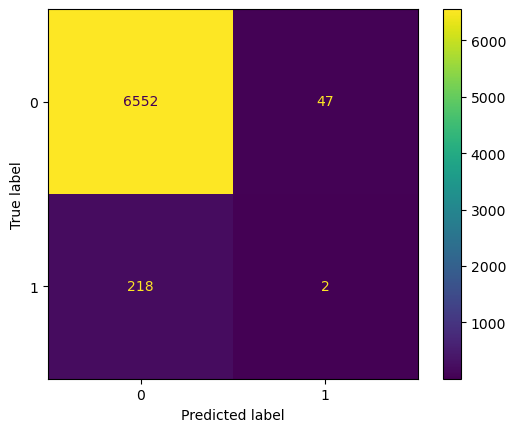

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Przetestujmy także naiwny klasyfikator bayesowski.

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

scores = cross_val_score(model, X, y, cv=5, scoring= 'f1')
scores

array([0.05963636, 0.07407407, 0.06323529, 0.06019564, 0.06277372])

Widzimy bardzo niską czułość i swoistość. Model nie jest lepszy niż losowe zgadywanie.

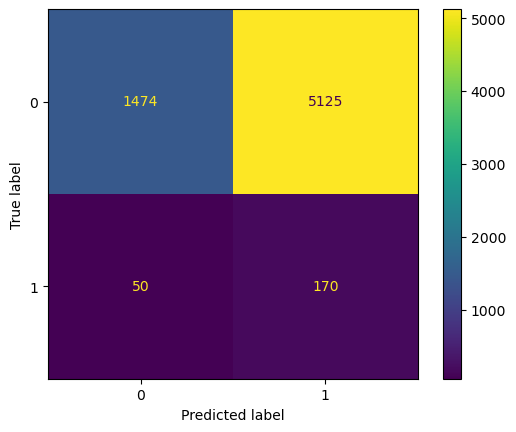

In [10]:
y_pred = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Zobaczmy klasyfikator najbliższych sąsiadów.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

scores = cross_val_score(model, X, y, cv= 5, scoring='f1')

scores

array([0.03636364, 0.        , 0.04081633, 0.04166667, 0.04444444])

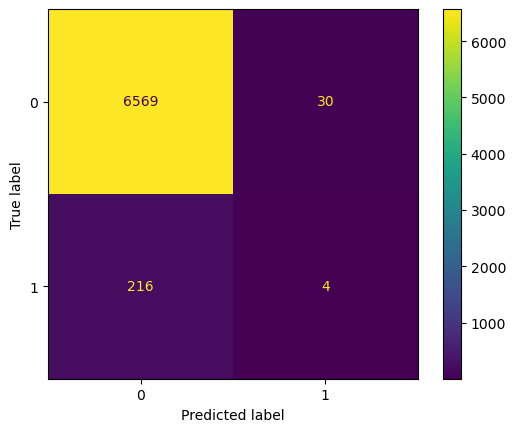

In [12]:
y_pred = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Sprawdźmy klasyczny las losowy.

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv= 5, scoring='f1')

scores

array([0.40677966, 0.11494253, 0.29090909, 0.25      , 0.12765957])

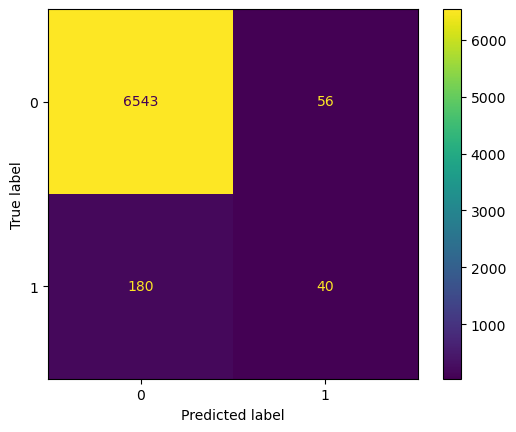

In [14]:
y_pred = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier()

scores = cross_val_score(model, X, y, cv=5, scoring= 'f1')
scores

array([0.37362637, 0.208     , 0.11320755, 0.29032258, 0.32142857])

Model XGBoost również nie sprawdził się dobrze, konieczne będzie zaimplementowanie metod, wykorzystywanych w przypadku niezrównoważonych klas.

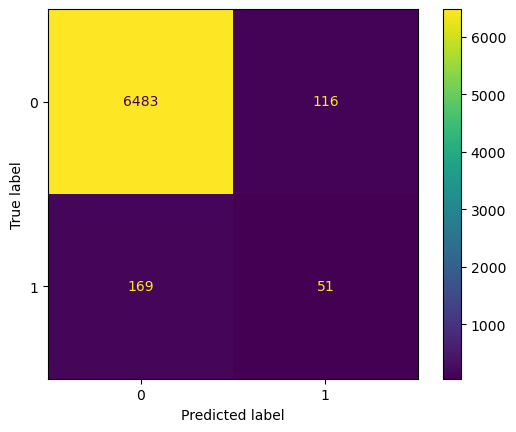

In [16]:
y_pred = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Sprawdźmy jaką stratę w jakości spowoduje wprowadzenie dekompozycji PCA. Zredukujemy liczbę cech do 30.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_.sum())

1.0


In [18]:
model = XGBClassifier()

scores = cross_val_score(model, X_pca, y, cv=5, scoring= 'f1')
scores

array([0.03636364, 0.07142857, 0.14285714, 0.04166667, 0.04444444])

Model ma gorszą jakość, występuje znacznie niższa precyzja i czułość.

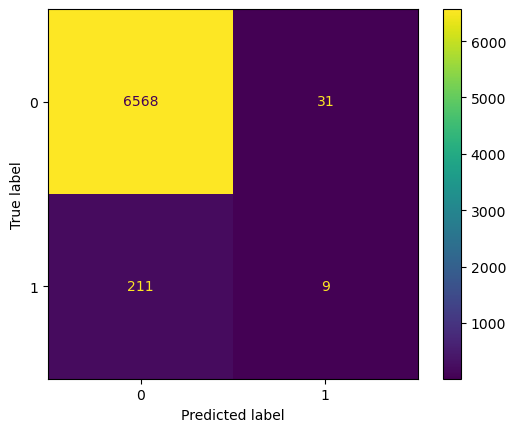

In [19]:
y_pred = cross_val_predict(model, X_pca, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Sprawdźmy jakość modelu z wprowadzonym skalowaniem.

In [20]:
(y == 1).value_counts()/(y == 0).value_counts()

False    29.995455
True      0.033338
Name: Bankrupt?, dtype: float64

In [21]:
model = XGBClassifier(scale_pos_weight = 29.995455)

scores = cross_val_score(model, X, y, cv=5, scoring= 'f1')
scores

array([0.47368421, 0.17105263, 0.51282051, 0.46753247, 0.35483871])

Wynik jest lepszy niż w przypadku podstawowego modelu.

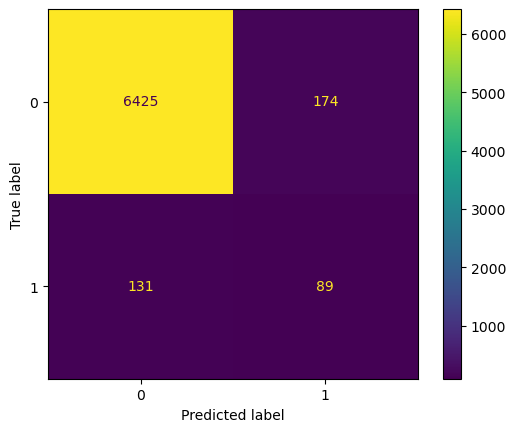

In [22]:
y_pred = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Przetestujmy jedną z popularniejszych metod oversamplingu, którą jest SMOTE (Synthetic Minority Over-sampling Technique).  
Ta metoda polega na stworzeniu tylu dodatkowych próbek mniejszościowej klasy, aby ich liczba dorównywała drugiej (bądź reszcie) klas.  
Algorytm tworzenia nowych danych polega na wybraniu k-sąsiadów (domyślnie 5) dla każdego przykładu klasy mniejszowściowej, następnie wybiera losowego sąsiada i tworzy punkt na prostej między punktem oryginalnym a sąsiadem.  

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=15)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before:", Counter(y))
print("After:", Counter(y_resampled))


Before: Counter({0: 6599, 1: 220})
After: Counter({1: 6599, 0: 6599})


Teraz skonstruujmy model, w którym tylko w części treningowej będą interpolowane dane, a samo testowanie będzie się odbywało na danych oryginalnych.  
Dodamy dwie metryki oceny, f1 score i roc_score.  
Użyjemy Stratified Fold, metody kroswalidacji która dzieli dane w taki sposób, żeby stosunek klas był podobny w każdym foldzie.

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

kf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 15) #kf jako instancja klasy StratifiedFold


f1_scores= []  #utworzenie list które potem będą wykorzystane w iteracji po foldach
roc_auc_scores = []

cm_total = np.zeros((2, 2), dtype=int) #przyszła macierz pomyłek wypełniona zerami

for train_index, test_index in kf.split(X, y): #pętla dzieląca dane na foldy
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index] #podział na część treningową i walidacyjną
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

    X_resampled, y_resampled = smote.fit_resample(X_train, y_train) #użycie SMOTE do interpolacji danych na zbiorze treningowym
    
    model = XGBClassifier()

    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_valid)

    cm = confusion_matrix(y_valid, y_pred, labels=[0, 1])
    cm_total += cm #dodajemy macierz pomyłek tego foldu do zbiorczej macierzy pomyłek utworzonej przed pętlą

    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_pred)

    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    print(f1, roc_auc)

print('Średnia:', np.mean(f1_scores), np.mean(roc_auc_scores))

0.45569620253164556 0.6981060606060606
0.4835164835164835 0.7405303030303031
0.5 0.731439393939394
0.4897959183673469 0.7613636363636364
0.4731182795698925 0.739764973464746
Średnia: 0.4804253767970737 0.7342408734808279


Możemy zaobserwować znacznie lepszą jakość modelu. 
F1 score jest zdecydowanie lepszy od modeli bez interpolacji. Roc/auc score również wskazuje na przydatność modelu.  
Niecała połowa jedynek została prawidłowo wykryta a ten wynik można jeszcze poprawić.

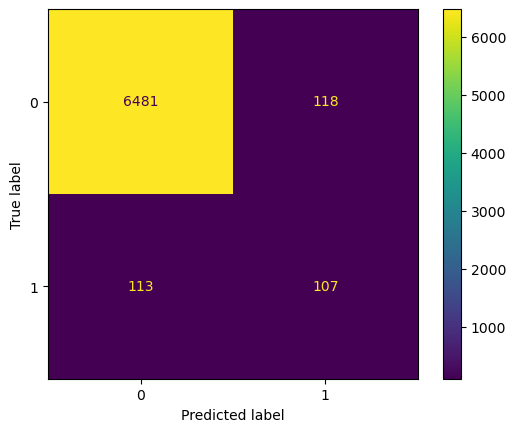

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_total) # wyświetlamy naszą macierz pomyłek
disp.plot()
plt.show()

Zanim sprawdzimy inne metody oversamplingu, spróbujmy wytrenować model na bardziej odpowiednich parametrach , a także zmieniać próg odcięcia dla lepszej czułości kosztem precyzji.  
Pętlę kroswalidacji z interpolacją SMOTE na danych treningowych da się przeprowadzić za pomocą pipeline-u biblioteki imblearn.

In [ ]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([ # w pipelinie używamy smote jako metody oversamplingu a także XGB jako nasz model
    ('smote', SMOTE(random_state=15)), 
    ('model', XGBClassifier(device='gpu'))
    ])

param_grid = {
    'model__n_estimators': [20, 50, 100], #liczba drzew
    'model__max_depth': [6, 10, 15], #głębokość drzew
    'model__learning_rate': [0.1, 0.3], #szybkość uczenia
    'model__lambda': [1, 5, 10], #regularyzacja l2
}

Przeszukamy siatkę parametrów za pomocą GridSearchCV, które sprawdzi wszystkie zaproponowane kombinacje parametrów modelu za pomocą kroswalidacji.  

In [29]:
from sklearn.model_selection import GridSearchCV

SMOTE_search = GridSearchCV(estimator=pipeline, param_grid= param_grid, scoring='f1', cv=kf, return_train_score=True) #jako metodę kroswalidacji używamy utworzoną wcześniej instancję Stratified Fold

SMOTE_search.fit(X, y)

print("Najlepsze parametry:", SMOTE_search.best_params_)
print("Najlepszy wynik F1:", SMOTE_search.best_score_)

c:\Users\adamo\anaconda3\Lib\site-packages\xgboost\core.py:729: UserWarning: [11:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


Najlepsze parametry: {'model__lambda': 1, 'model__learning_rate': 0.3, 'model__max_depth': 10, 'model__n_estimators': 100}
Najlepszy wynik F1: 0.4906488205626486


In [30]:
best_pipeline = SMOTE_search.best_estimator_

Chcemy zobaczyć jak wygląda macierz pomyłek na trzech różnych progach odcięcia klasyfikacji.  
Na tej podstawie możemy zobaczyć jak wygląda trade-off wykrywalności prawdziwie pozytywnych przypadków z fałszywie pozytywnymi w różnych miejscach odcięcia.

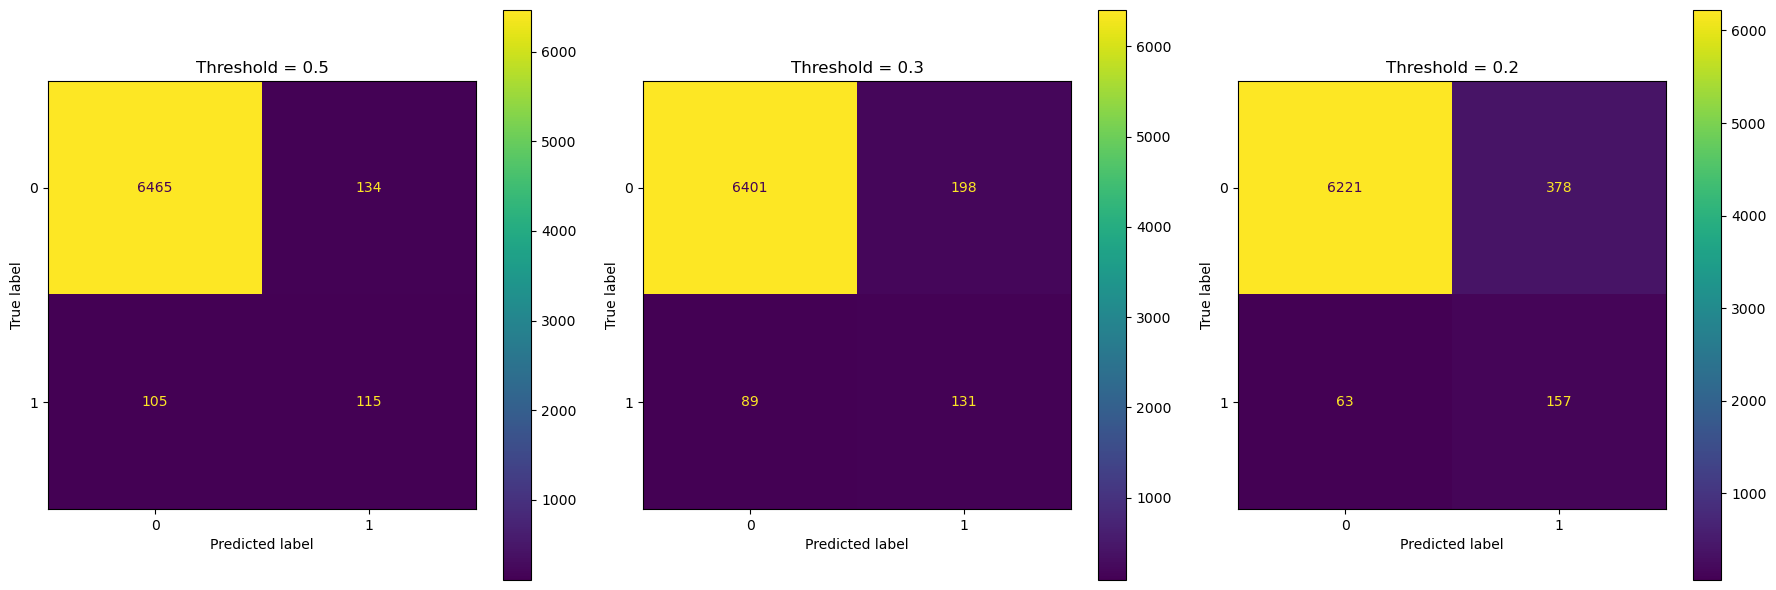

In [ ]:
smote_pred = cross_val_predict(best_pipeline, X, y, cv=kf, method='predict_proba')
smote_prob_1 = smote_pred[:, 1]

threshold = 0.5
smote_pred1 = (smote_prob_1 >= threshold).astype(int)

threshold = 0.25
smote_pred2 = (smote_prob_1 >= threshold).astype(int)

threshold = 0.05
smote_pred3 = (smote_prob_1 >= threshold).astype(int)

cm1 = confusion_matrix(y, smote_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)

cm2 = confusion_matrix(y, smote_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

cm3 = confusion_matrix(y, smote_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

disp1.plot(ax=axes[0], colorbar =False)
axes[0].set_title('Threshold = 0.5')

disp2.plot(ax=axes[1], colorbar =False)
axes[1].set_title('Threshold = 0.3')

disp3.plot(ax=axes[2], colorbar =False)
axes[2].set_title('Threshold = 0.2')


plt.tight_layout()
plt.show()



Przetestujmy inne podejście, ze zmianą wagi wewnątrz modelu XGB. Użyjemy tego jako hiperparametru w siatce przeszukiwań.  
Najpierw jednak stwórzmy nową metrykę na bazię F1-score, jednak z większą wagą dla czułości.  
Zakładamy, że bardziej zależy nam na wykryciu przypadków bankructwa kosztem błędnego zakwalifikowania jako fałszywie pozytywny.

In [32]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=15)),
    ('model', XGBClassifier(device='gpu'))
    ])

param_grid = {
    'model__n_estimators': [20, 50, 100], #liczba drzew
    'model__max_depth': [6, 10, 15], #głębokość drzew
    'model__learning_rate': [0.1, 0.3], #szybkość uczenia
    'model__lambda': [1, 5, 10], #regularyzacja l2
    'model__scale_pos_weight': [1, 2, 5]
    }

In [ ]:
from sklearn.metrics import make_scorer

def weighted_f1(y_true, y_pred): #tworzymy funkcję metryki

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    if tp + fp == 0 or tp + fn == 0:
        return 0.0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    if precision + recall == 0:
        return 0.0

    f1 = (precision * (recall * 3)) / (precision + recall)
    return f1


w_f1 = make_scorer(weighted_f1) #tworzymy metrykę

In [34]:
from sklearn.model_selection import GridSearchCV

SMOTE_search = GridSearchCV(estimator=pipeline, param_grid= param_grid, scoring=w_f1, cv=kf, return_train_score=True) #jako metodę kroswalidacji używamy utworzoną wcześniej instancję Stratified Fold

SMOTE_search.fit(X, y)

print("Najlepsze parametry:", SMOTE_search.best_params_)
print("Najlepszy wynik ważonego F1:", SMOTE_search.best_score_)

Najlepsze parametry: {'model__lambda': 5, 'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__scale_pos_weight': 5}
Najlepszy wynik ważonego F1: 0.7513581185571483


In [35]:
best_pipeline = SMOTE_search.best_estimator_

Metoda działa ponieważ przy identycznej czułości model osiągnął lepszą precyzję co poprzedni przy progu odcięciu w punkcie 0.3.

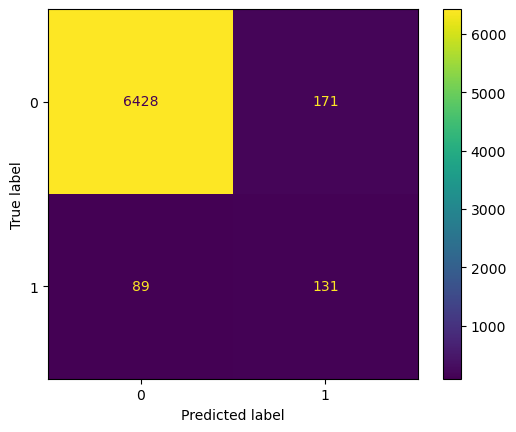

In [36]:
smote_pred = cross_val_predict(best_pipeline, X, y, cv=kf)
cm = confusion_matrix(y, smote_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Użyjemy metody ADASYN w połączeniu z przeszukaniem wagi w siatce parametrów. Ta metoda generuje więcej nowych próbek wokół punktów trudniejszych do sklasyfikowania.  
Wartość trudności obliczona jest na podstawie najbliższych sąsiadów należących do innej klasy.

In [37]:
from imblearn.over_sampling import ADASYN

pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=15)),
    ('model', XGBClassifier(device='gpu'))
    ])

param_grid = {
    'model__n_estimators': [20, 50, 100], #liczba drzew
    'model__max_depth': [6, 10, 15], #głębokość drzew
    'model__learning_rate': [0.1, 0.3], #szybkość uczenia
    'model__lambda': [1, 5, 10], #regularyzacja l2
    'model__scale_pos_weight': [1, 5]
}

In [38]:
ADASYN_search = GridSearchCV(estimator=pipeline, param_grid= param_grid, scoring= w_f1, cv=kf, return_train_score=True)

ADASYN_search.fit(X, y)

print("Najlepsze parametry:", ADASYN_search.best_params_)
print("Najlepszy wynik ważonego F1:", ADASYN_search.best_score_)

Najlepsze parametry: {'model__lambda': 1, 'model__learning_rate': 0.3, 'model__max_depth': 10, 'model__n_estimators': 100, 'model__scale_pos_weight': 1}
Najlepszy wynik ważonego F1: 0.7613711566488421


In [39]:
best_pipeline = ADASYN_search.best_estimator_

Macierz pomyłek wygląda obiecująco, model przewiduje większość prawdziwie pozytywnych przypadków.

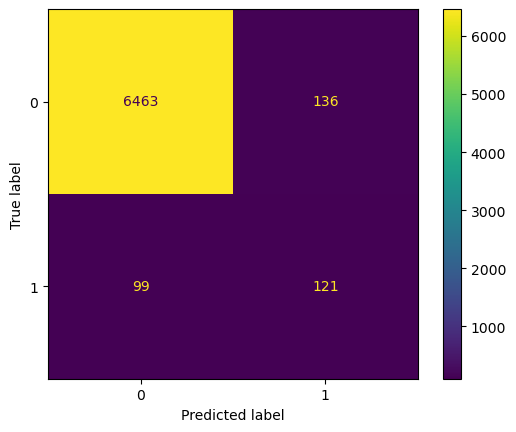

In [40]:
adasyn_pred = cross_val_predict(best_pipeline, X, y, cv=kf)
cm = confusion_matrix(y, adasyn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Sprawdźmy jaki będzie trade-off dla większej czułości.  
Model wygląda dobrze, wykrywa prawie 3/4 pozytywnych przypadków przy akceptowalnej liczbie pomyłek.

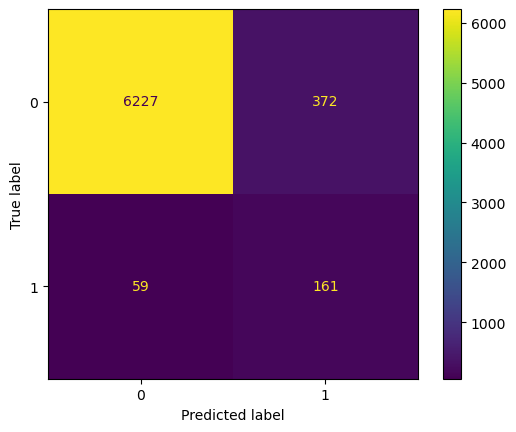

In [41]:
adasyn_pred = cross_val_predict(best_pipeline, X, y, cv=kf, method = 'predict_proba')
adasyn_1 = adasyn_pred[:,1]
threshold = 0.05
adasyn_pred = (adasyn_1 >= threshold).astype(int)
cm = confusion_matrix(y, adasyn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Wykorzystamy teraz metodę undersamplingu - centroidy klastrów.  
Redukuje ona liczbę próbek większej klasy zastępując je centroidami klastrów z nich skontruowanych.. Powoduje to mniejszą utratę informacji z datasetu niż w przypadku losowego próbkowania.

In [42]:
from imblearn.under_sampling import ClusterCentroids

pipeline = Pipeline([
    ('CC', ClusterCentroids(random_state=15)),
    ('model', XGBClassifier(device='gpu'))
    ])

param_grid = {
    'model__n_estimators': [10, 20, 50], #liczba drzew
    'model__max_depth': [6, 10, 15], #głębokość drzew
    'model__learning_rate': [0.1, 0.3], #szybkość uczenia
    'model__lambda': [1, 5, 10], #regularyzacja l2
    'model__scale_pos_weight': [1, 2, 5]
}

In [43]:
cc_search = GridSearchCV(estimator=pipeline, param_grid= param_grid, scoring=w_f1, cv=kf, return_train_score=True)

cc_search.fit(X, y)

print("Najlepsze parametry:", cc_search.best_params_)
print("Najlepszy wynik ważonego F1:", cc_search.best_score_)

Najlepsze parametry: {'model__lambda': 10, 'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__n_estimators': 10, 'model__scale_pos_weight': 1}
Najlepszy wynik ważonego F1: 0.17269152962274037


In [44]:
best_pipeline = cc_search.best_estimator_

Model klasfykuje prawie wszystkie jedynki ale zbyt dużym kosztem ilości pomyłek.

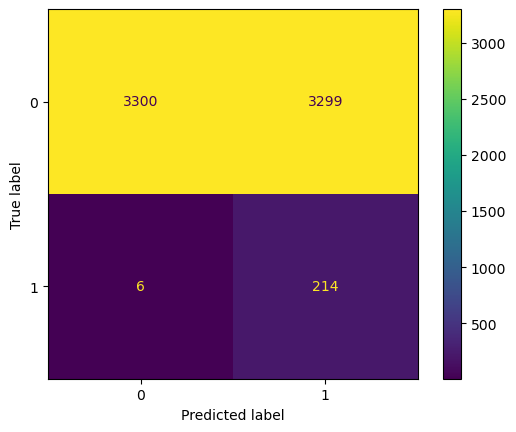

In [45]:
cc_pred = cross_val_predict(best_pipeline, X, y, cv=kf)
cm = confusion_matrix(y, cc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Skorzystamy z metody undersamplingu TomekLinks. Polega ona na identyfikacji bliskich sobie próbek z przeciwnych klas. Metoda usuwa próbki par wchodzące do klasy większościowej przez co "czyści" granicę decyzyjną.

In [46]:
from imblearn.under_sampling import TomekLinks
pipeline = Pipeline([
    ('TL', TomekLinks()),
    ('model', XGBClassifier(device='gpu'))
    ])

param_grid = {
    'model__n_estimators': [10, 20, 50], #liczba drzew
    'model__max_depth': [6, 10, 15], #głębokość drzew
    'model__learning_rate': [0.1, 0.3], #szybkość uczenia
    'model__lambda': [1, 5, 10], #regularyzacja l2
    'model__scale_pos_weight': [1, 2, 5, 10]
}

In [47]:
TL_search = GridSearchCV(estimator=pipeline, param_grid= param_grid, scoring=w_f1, cv=kf, return_train_score=True)

TL_search.fit(X, y)

print("Najlepsze parametry:", TL_search.best_params_)
print("Najlepszy wynik F1:", TL_search.best_score_)

Najlepsze parametry: {'model__lambda': 5, 'model__learning_rate': 0.3, 'model__max_depth': 10, 'model__n_estimators': 50, 'model__scale_pos_weight': 10}
Najlepszy wynik F1: 0.6879544553007182


In [48]:
best_pipeline = TL_search.best_estimator_

Zbyt niska czułość, sprawdźmy co dzieje się w przypadku zmiany progu odcięcia.

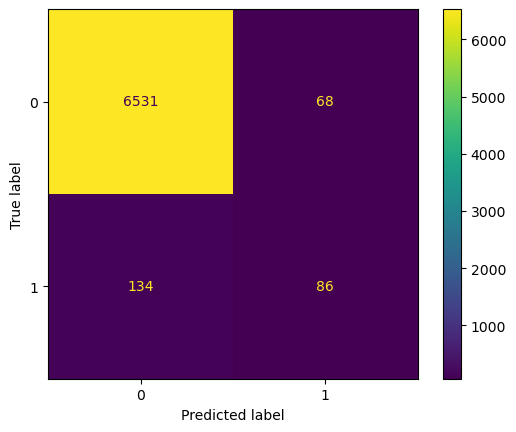

In [49]:
tl_pred = cross_val_predict(best_pipeline, X, y, cv=kf)
cm = confusion_matrix(y, tl_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Model jest mniej dokładny niż ten z interpolacją metodą ADASYN z progiem odcięcia 0.05.

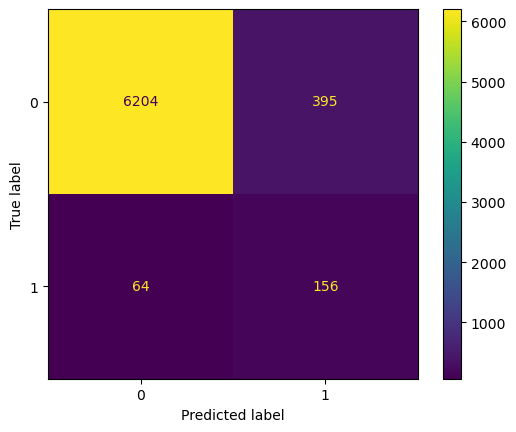

In [209]:
tl_pred = cross_val_predict(best_pipeline, X, y, cv=kf, method = 'predict_proba')
tl_1 = tl_pred[:,1]
threshold = 0.03
tl_pred = (tl_1 >= threshold).astype(int)
cm = confusion_matrix(y, tl_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Podsumowując - najlepszymi modelami są te bazujące na metodzie oversamplingu - ADASYN. 
W jaki sposób można znaleźć lepszy model od zaprezentowanych powyżej?  
- dokładniejsze przeszukanie siatki hiperparametrów (więcej parametrów, większy zakres)
- przetestowanie innych modeli (np. SVM, LightGBM, sieci neuronowe) w sposób tak dokładny jak zaprezentowany na modelu XGBoost
- konstrukcja dodatkowych cech (logarytmowanie, potęgowanie, interakcje między cechami), a także selekcjonowanie ich z najbardziej obiecujących
- metamodel na kilku końcowych modelach (XGB, LGBM, SVM) i/lub kilku najbardziej obiecujących metodach over/undersamplingu